<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/BA_Clasificacion_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diplomatura en **Business Analytics** - FCEJ/UdA - **Algoritmos de Clasificación**
***PyCaret / Árbol de Decisión***

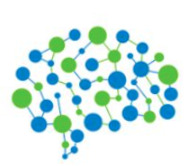

# Instalando PyCaret

In [1]:
!pip install pycaret[full]

     |████████████████████████████████| 256kB 4.1MB/s 
     |████████████████████████████████| 6.8MB 7.1MB/s 
     |████████████████████████████████| 1.7MB 43.1MB/s 
     |████████████████████████████████| 14.2MB 289kB/s 
     |████████████████████████████████| 174kB 57.7MB/s 
     |████████████████████████████████| 1.8MB 43.3MB/s 
     |████████████████████████████████| 65.8MB 54kB/s 
     |████████████████████████████████| 102kB 10.6MB/s 
     |████████████████████████████████| 245kB 44.2MB/s 
     |████████████████████████████████| 276kB 43.8MB/s 
     |████████████████████████████████| 157.5MB 81kB/s 
     |████████████████████████████████| 358kB 50.1MB/s 
     |████████████████████████████████| 47.5MB 109kB/s 
     |████████████████████████████████| 3.6MB 36.4MB/s 
     |████████████████████████████████| 348kB 49.9MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 296kB 46.8MB/s 
     |████████████████████████████████| 163kB 50.2M

# Habilitando Google Colab y módulos necesarios

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd

## Extracción de Datos - Creación del DataFrame

In [4]:
datos_url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/Clientes.csv"

In [5]:
datos = pd.read_csv(datos_url)
datos

,ID,Sexo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


## Limpieza

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Sexo     400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
datos = datos.drop(columns=["ID"])
datos

,Sexo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


In [8]:
datos.shape

(400, 4)

## Dividiendo el conjunto de datos

In [9]:
clientes = datos.sample(frac=0.75, random_state=0)
clientes_no_vistos = datos.drop(clientes.index)

In [10]:
clientes.reset_index(inplace=True, drop=True)
clientes_no_vistos.reset_index(inplace=True, drop=True)

In [11]:
print("Datos para Modelar: " + str(clientes.shape))
print("Datos no vistos para Predicciones: " + str(clientes_no_vistos.shape))

Datos para Modelar: (300, 4)
Datos no vistos para Predicciones: (100, 4)


In [12]:
clientes.head()

,Sexo,Edad,Salario,Compra
0,1,30,87000,No
1,0,38,50000,No
2,1,35,75000,No
3,0,30,79000,No
4,0,35,50000,No


In [13]:
clientes_no_vistos.head()

,Sexo,Edad,Salario,Compra
0,0,35,65000,No
1,1,47,20000,Si
2,1,29,43000,No
3,0,27,137000,Si
4,0,21,16000,No


# Configuración del entorno en PyCaret

In [14]:
from pycaret.classification import *

In [15]:
clasificacion = setup(data = clientes, target = "Compra", session_id=123)

,Description,Value
0,session_id,123
1,Target,Compra
2,Target Type,Binary
3,Label Encoded,"No: 0, Si: 1"
4,Original Data,"(300, 4)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


# Comparando los algoritmos de Clasificación

In [16]:
modelos = ["dt", "xgboost", "rf", "nb", "qda"]

In [17]:
mejor_modelo = compare_models(include= modelos)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8998,0.9538,0.8917,0.8691,0.8770,0.7919,0.7966,0.018
nb,Naive Bayes,0.8902,0.9482,0.8819,0.8601,0.8678,0.7735,0.7778,0.017
xgboost,Extreme Gradient Boosting,0.8712,0.9293,0.8556,0.8421,0.8423,0.7334,0.7414,0.188
rf,Random Forest Classifier,0.8662,0.9275,0.8208,0.8500,0.8304,0.7197,0.7253,0.469
dt,Decision Tree Classifier,0.8612,0.8539,0.7972,0.8673,0.8227,0.7088,0.7190,0.307


In [18]:
print(mejor_modelo)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


# Creación del Modelo

In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## Algoritmo Árbol de Decisión

In [20]:
dt = create_model('dt')
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.8750,0.7500,1.0000,0.8571,0.7879,0.8062
1,0.8571,0.8365,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8095,0.7740,0.6250,0.8333,0.7143,0.5758,0.5892
3,0.8095,0.8221,0.8750,0.7000,0.7778,0.6147,0.6264
4,0.8571,0.8333,0.6667,1.0000,0.8000,0.6957,0.7303
5,0.9524,0.9583,1.0000,0.9000,0.9474,0.9041,0.9083
6,0.9048,0.9028,0.8889,0.8889,0.8889,0.8056,0.8056
7,0.9524,0.9444,0.8889,1.0000,0.9412,0.9014,0.9058
8,0.7143,0.7593,0.7778,0.6364,0.7000,0.4324,0.4404
9,0.8500,0.8333,0.7500,0.8571,0.8000,0.6809,0.6847


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# Optimizando el Modelo

In [21]:
optimizar_dt = tune_model(dt)
print(optimizar_dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9856,0.7500,1.0000,0.8571,0.7879,0.8062
1,0.8571,0.9375,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8571,0.9423,0.7500,0.8571,0.8000,0.6897,0.6934
3,0.8571,0.8942,0.8750,0.7778,0.8235,0.7042,0.7077
4,0.9524,1.0000,0.8889,1.0000,0.9412,0.9014,0.9058
5,0.9524,0.9491,1.0000,0.9000,0.9474,0.9041,0.9083
6,0.9524,0.9954,1.0000,0.9000,0.9474,0.9041,0.9083
7,0.9048,0.9352,0.8889,0.8889,0.8889,0.8056,0.8056
8,0.8571,0.8981,1.0000,0.7500,0.8571,0.7200,0.7500
9,0.8500,0.9531,0.7500,0.8571,0.8000,0.6809,0.6847


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


# Visualización del Modelo

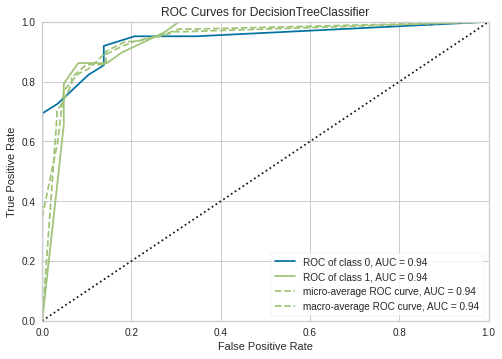

In [22]:
plot_model(optimizar_dt, plot = 'auc')

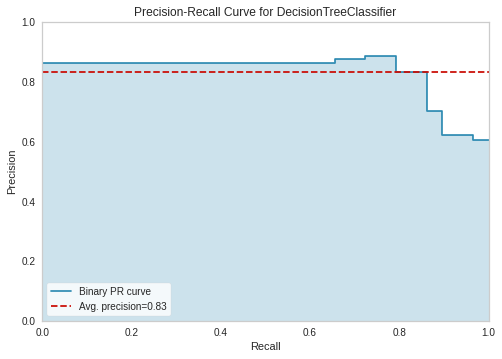

In [23]:
plot_model(optimizar_dt, plot = 'pr')

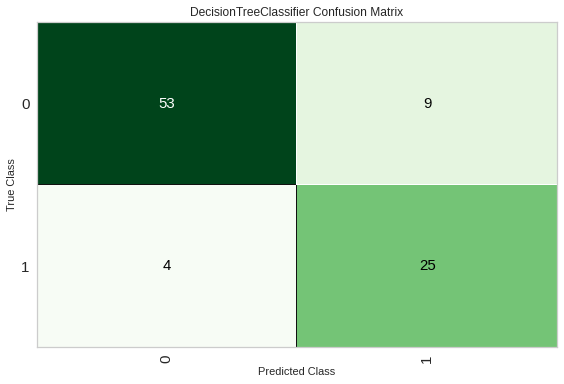

In [24]:
plot_model(optimizar_dt, plot = 'confusion_matrix')

In [25]:
evaluate_model(optimizar_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Predicción de los datos de prueba

In [26]:
predict_model(optimizar_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8571,0.9419,0.8621,0.7353,0.7937,0.6855,0.6905


,Edad,Salario,Sexo_1,Compra,Label,Score
0,48.0,29000.0,0.0,Si,Si,1.0000
1,59.0,29000.0,0.0,Si,Si,1.0000
2,27.0,90000.0,1.0,No,No,1.0000
3,45.0,79000.0,1.0,No,No,0.8182
4,23.0,66000.0,0.0,No,No,1.0000
...,...,...,...,...,...,...
86,46.0,59000.0,1.0,No,No,0.8182
87,40.0,78000.0,1.0,No,No,0.6000
88,35.0,61000.0,1.0,No,No,1.0000
89,36.0,126000.0,0.0,Si,Si,1.0000


# Finalizando el modelo para implementación

In [27]:
final_dt = finalize_model(optimizar_dt)
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [28]:
predict_model(final_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9231,0.9753,0.8621,0.8929,0.8772,0.8212,0.8215


# Predecir sobre datos no disponibles

In [29]:
clientes_no_vistos_prediccion = predict_model(final_dt, data=clientes_no_vistos)
clientes_no_vistos_prediccion.head()

,Sexo,Edad,Salario,Compra,Label,Score
0,0,35,65000,No,No,1.0
1,1,47,20000,Si,Si,0.8
2,1,29,43000,No,No,1.0
3,0,27,137000,Si,Si,1.0
4,0,21,16000,No,No,1.0


In [30]:
from pycaret.utils import check_metric
check_metric(clientes_no_vistos_prediccion['Compra'], clientes_no_vistos_prediccion['Label'], metric = 'Accuracy')

0.97

# Guardando el modelo

In [31]:
save_model(final_dt,"/content/drive/MyDrive/Modelos/modelo_arbol_decision_PyCaret")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Compra',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=6,
                        

# Accediendo al modelo guardado

In [32]:
saved_final_dt = load_model("/content/drive/MyDrive/Modelos/modelo_arbol_decision_PyCaret")

Transformation Pipeline and Model Successfully Loaded


In [33]:
nueva_prediccion = predict_model(saved_final_dt, data=clientes_no_vistos)
nueva_prediccion.head()

,Sexo,Edad,Salario,Compra,Label,Score
0,0,35,65000,No,No,1.0
1,1,47,20000,Si,Si,0.8
2,1,29,43000,No,No,1.0
3,0,27,137000,Si,Si,1.0
4,0,21,16000,No,No,1.0


In [34]:
from pycaret.utils import check_metric
check_metric(nueva_prediccion['Compra'], nueva_prediccion['Label'], metric = 'Accuracy')

0.97